In [1]:
import os
import sys
sys.path.append("12_16_21")
import fld_tools as ft
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from repmat import repmat
from flds import FldsU
from flds import FldsNU
import numpy as np

In [3]:
dims = [288,468,88];
data_dir = '/nobackup/amondal/Python/Joes_kpp_code/data/'#'/scratch/p/peltier/jskitka/runs/2km_109l/kpp_all_on/run/';
aux_data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Joe_aux_data/'#'/home/p/peltier/jskitka/aux_data/low_res/';
home_dir = '/nobackup/amondal/Python/Joes_kpp_code/';#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/';
save_dir = '/nobackup/amondal/Python/Joes_kpp_code/validate_kpp_save_dir/';#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/figures/';
os.chdir(home_dir)



## Build File List

lw = 3; fsize=16;
iters = [2];
cmax = 1e-6;



## Read in the Data

trim_ml = 30; # in meters
post_hann = [1,1,0]; # this is passed in but not actually used... 

f = FldsNU();
f.load_mitgcm_data(data_dir,aux_data_dir,iters,dims);
RHOAnoma = f.load_mitgcm_field('RHOAnoma',data_dir,iters,dims);
KPPviscA = f.load_mitgcm_field('KPPviscA',data_dir,iters,dims);
KPPdbloc = f.load_mitgcm_field('KPPdbloc',data_dir,iters,dims);
KPPRi = f.load_mitgcm_field('KPPRi',data_dir,iters,dims);
KPPhbl = f.load_mitgcm_field('KPPhbl',data_dir,iters,dims[0:2]);
KPPdU = f.load_mitgcm_field('Um_ImplD',data_dir,iters,dims);
KPPdV = f.load_mitgcm_field('Vm_ImplD',data_dir,iters,dims);

max S = 35.393211364746094
min S = 0.0
max T = 24.346668243408203
min T = 0.0
max U = 0.8634651899337769
min U = -0.6833522915840149
max V = 0.8318789005279541
min V = -0.6641660928726196
max W = 0.02351987734436989
min W = -0.023023640736937523


ValueError: could not broadcast input array from shape (468,) into shape (88,)

In [ ]:
f.S.shape

In [4]:
dims = [87, 2400, 2400]; #Hector's code has 87 layers
data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/'#'/scratch/p/peltier/jskitka/runs/2km_109l/kpp_all_on/run/';
aux_data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/';#'/home/p/peltier/jskitka/aux_data/low_res/';
home_dir ='/nobackup/amondal/Python/Joes_kpp_code/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/';
save_dir = '/nobackup/amondal/Python/Joes_kpp_code/validate_Hector_kpp_save_dir/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/figures/';
os.chdir(home_dir)

In [5]:
len(np.flip(dims))

3

In [6]:
## Build File List

lw = 3; fsize=16;
iters = [798408];
cmax = 1e-6;


## Read in the Data

trim_ml = 30; # in meters
post_hann = [1,1,0]; # this is passed in but not actually used... 

#f = FldsNU();

In [7]:
import numpy as np
nt = len(iters);
field = np.empty(dims + [nt])
filename = data_dir + 'S.' + str(iters[0]).rjust(10,'0') + '.data';
fid = open(filename, 'rb')
f = np.fromfile(fid, dtype=np.dtype('>f4'), count = np.prod(dims))

In [8]:
2400*2400*87

501120000

In [9]:
dims = [87, 2400, 2400];
ndims = len(dims);
Pfield = np.zeros(dims);
for k in range(0,dims[0]):
    for j in range(0,dims[1]):
        i1 = k*dims[1]*dims[2] + j*dims[2]
        i2 = i1+dims[2];
        Pfield[k,j,:] = f[i1:i2];

In [10]:
np.nansum(Pfield - S)

NameError: name 'S' is not defined

In [ ]:
Pfield.shape

In [ ]:
Pfield_switch = np.swapaxes(Pfield, 0, 2)

In [ ]:
Pfield_switch.shape

In [ ]:
f[i1:i2].shape

In [ ]:
f[0:2400]

In [ ]:
S[0,0, 0:2400]

In [ ]:
2400*2400

In [ ]:
(f[5760001:5762401] - S[1,0, 0:2400]).sum()
#(f[2401:4801] - S[0,0:2400]).sum()

In [ ]:
f.S = ft.rdmds(data_dir + 'S',iters, [2400, 2400, 87], 'S');

In [ ]:
f.S.shape

In [ ]:
300*300*87

In [ ]:
f.shape

In [ ]:
field[:,:,:,0] = ft.switch_row_column_major(f,dims);

In [ ]:
field.shape

In [ ]:
lonc = ft.read_bin(aux_data_dir + 'LONC', (1, 2400, 2400));

In [ ]:
lonc.shape

In [ ]:
lonc = ft.read_bin(aux_data_dir + 'LONC', (1, 2400, 2400));
long = ft.read_bin(aux_data_dir + 'LONG', (1, 2400, 2400));
latc = ft.read_bin(aux_data_dir + 'LATC', (1, 2400, 2400));
latg = ft.read_bin(aux_data_dir + 'LATG', (1, 2400, 2400));

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(lonc[0, :, :])
plt.colorbar()

In [ ]:
%matplotlib inline
plt.imshow(c.lon)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(long[0, :,:])
plt.colorbar()

In [ ]:
%matplotlib inline
plt.imshow(c.long)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(latc[0, :, :])
plt.colorbar()

In [ ]:
%matplotlib inline
plt.imshow(c.lat)

In [ ]:
plt.imshow(latg[0,:,:])
plt.colorbar()

In [ ]:
%load_ext autoreload

In [1]:
import os
import sys
sys.path.append("12_16_21")
import numpy as np
import fld_tools as ft
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from repmat import repmat
from flds import FldsU
from flds import FldsNU
#sys.path.append('/nobackup/htorresg/DopplerScat/modelling/GS/programs/tools')
sys.path.append('/u/htorresg/Experiment_CCS/programas/tools')
sys.path.append('/nobackup/amondal/Python/CCS_Analysis')
import handle_mitgcm as model
import params_500mSNAPS_joecode as p


dims = [87, 2400,2400]; #Hector's code has 87 layers # I think switching the height might fix the switch_column_row function (7/7/22)
truncdims = [0, 300, 0, 300, 0, 87];
data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/'#'/scratch/p/peltier/jskitka/runs/2km_109l/kpp_all_on/run/';
aux_data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/';#'/home/p/peltier/jskitka/aux_data/low_res/';
home_dir ='/nobackup/amondal/Python/Joes_kpp_code/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/';
save_dir = '/nobackup/amondal/Python/Joes_kpp_code/validate_Hector_kpp_save_dir/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/figures/';
os.chdir(home_dir)



## Build File List

lw = 3; fsize=16;
iters = [798408, 798552];
cmax = 1e-6;

c = model.LLChires(p.dirc, p.dirc, p.nx, p.ny, p.nz, p.tini, p.tref, p.tend, p.steps,p.rate, p.timedelta);

## Read in the Data

trim_ml = 30; # in meters
post_hann = [1,1,0]; # this is passed in but not actually used... 

f = FldsNU();
f.load_mitgcm_data_trunc(data_dir,aux_data_dir,iters,dims, truncdims);

max S = 34.699256896972656
min S = 0.0
max T = 24.92448616027832
min T = 0.0
max U = 2.2401888370513916
min U = -1.31050443649292
max V = 1.7340795993804932
min V = -1.354968547821045
max W = 0.14884014427661896
min W = -0.17961512506008148
min depth = 0.0
max depth = 5442.7119140625
delR is missing. I'll try RF instead
max Z = 0.0
min Z = -5681.69
min thknss = 0.0
max thknss = 334.63965


In [13]:
f.S.shape

(299, 299, 87, 2)

In [12]:
p = (np.cumsum(f.thknss,axis=2)-0.5*f.thknss)*9.81*1035/10000 + 10;
p.shape

(299, 299, 87, 2)

In [7]:
f.p[:,:,4,0].shape

AttributeError: 'FldsNU' object has no attribute 'p'

In [5]:
np.squeeze(f.pgrid[:,:,0]).shape

(299, 299)

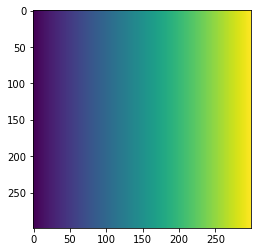

In [6]:
%matplotlib inline
plt.imshow(f.pgrid[:,:,0])

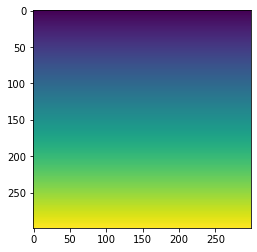

In [7]:
plt.imshow(f.pgrid[:,:,1])

In [2]:
truncdims = [0, 300, 0, 300, 0, 87];
KPPviscA = f.load_mitgcm_field_trunc('KPPviscA', data_dir, iters,dims,truncdims);#f.load_mitgcm_field('KPPviscA',data_dir,iters,dims);
KPPhbl = f.load_mitgcm_field_trunc('KPPhbl',data_dir,iters,dims[1:3], truncdims[0:4]);
#KPPviscA = c.loadding_3D_data(p.dirc+'KPPviscA.%010i.data'%iters[0], maxlevel, 'tracer')
# Can we set f's KPPvisc equal to c's KPPviscA?




## - Compute KPP Diagnostic Parameters

#(dU,dV,viscAz,dbloc) = f.compute_kpp_diag(post_hann,trim_ml);

In [3]:
KPPviscA.shape

(300, 300, 87, 2)

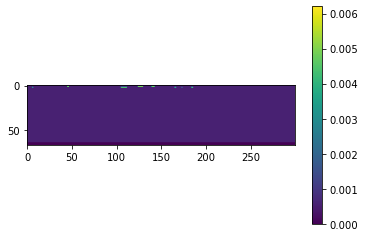

In [5]:
%matplotlib inline
plt.imshow(KPPviscA[:, 50, 20:, 1].T)
plt.colorbar()

In [6]:
(dU,dV,viscAz,dbloc) = f.compute_kpp_diag(post_hann,trim_ml);

in compute_nu_kpp()
viscArNr = 0.00056614
Riinfty = 0.6998


/nobackupp12/amondal/Python/Joes_kpp_code/compute_nu_kpp.py:144: UserWarning: thknss needs adapting for HYCOM, etc.
  warnings.warn("thknss needs adapting for HYCOM, etc.");
/nobackupp12/amondal/Python/Joes_kpp_code/12_16_21/vert_grid_mitgcm.py:18: UserWarning: thknss needs adapting for HYCOM, etc.
  warnings.warn("thknss needs adapting for HYCOM, etc.");


In [6]:
KPPviscA.shape

(300, 300, 87, 1)

In [7]:
viscAz.shape

(299, 299, 87, 2)

In [11]:
viscAz[:,:,20,0]

array([[0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       ...,
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614]])

In [10]:
KPPviscA[:,:,20,0]

array([[0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       ...,
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614],
       [0.00056614, 0.00056614, 0.00056614, ..., 0.00056614, 0.00056614,
        0.00056614]])

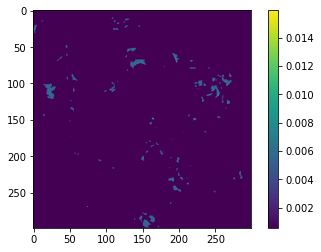

In [12]:
%matplotlib inline
plt.imshow(viscAz[:,:,20,0].T)
plt.colorbar()

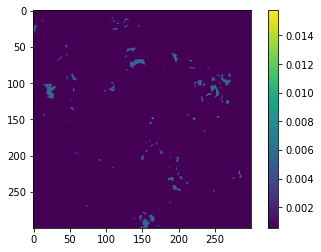

In [14]:
%matplotlib inline
plt.imshow(KPPviscA[:,:,20,0].T)
plt.colorbar()

In [18]:
(KPPviscA[:-1,:-1,:,0] - viscAz[:, :, :, 0]) / (KPPviscA[:-1,:-1, :, 0])

array([[[            nan, -3.57046966e-01,  4.08030521e-02, ...,
                     nan,             nan,             nan],
        [            nan, -2.73323276e+00, -1.35329097e+00, ...,
                     nan,             nan,             nan],
        [            nan, -2.68839276e+00, -1.28039031e+00, ...,
                     nan,             nan,             nan],
        ...,
        [            nan, -2.50909370e+00, -9.76485524e-01, ...,
         -1.43765913e-08, -1.43765913e-08,             nan],
        [            nan, -2.30660316e+00, -8.12269303e-01, ...,
         -1.43765913e-08, -1.43765913e-08,             nan],
        [            nan, -2.17664944e+00, -7.39156128e-01, ...,
         -1.43765913e-08, -1.43765913e-08,             nan]],

       [[            nan, -1.79165407e+00, -4.55850248e-01, ...,
                     nan,             nan,             nan],
        [            nan, -2.71717878e+00, -1.63838178e+00, ...,
                     nan,             

In [19]:
(KPPviscA[1:,1:,20,0] - viscAz[:, :, 20, 0]) / (KPPviscA[1:,1:, 20, 0])

array([[-1.43765913e-08, -1.43765913e-08, -1.43765913e-08, ...,
        -1.43765913e-08, -1.43765913e-08, -1.43765913e-08],
       [-1.43765913e-08, -1.43765913e-08, -1.43765913e-08, ...,
        -1.43765913e-08, -1.43765913e-08, -1.43765913e-08],
       [-1.43765913e-08, -1.43765913e-08, -1.43765913e-08, ...,
        -1.43765913e-08, -1.43765913e-08, -1.43765913e-08],
       ...,
       [-1.43765913e-08, -1.43765913e-08, -1.43765913e-08, ...,
        -1.43765913e-08, -1.43765913e-08, -1.43765913e-08],
       [-1.43765913e-08, -1.43765913e-08, -1.43765913e-08, ...,
        -1.43765913e-08, -1.43765913e-08, -1.43765913e-08],
       [-1.43765913e-08, -1.43765913e-08, -1.43765913e-08, ...,
        -1.43765913e-08, -1.43765913e-08, -1.43765913e-08]])

So it seems like Joe's code shifts the x and y coordinates one forward. That makes sense if there are derivatives in x and y (which you would expect for 

TypeError: Invalid shape (1, 87, 300) for image data

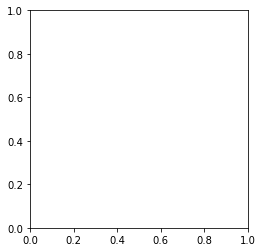

In [21]:
%matplotlib inline
plt.imshow(KPPviscA[66,0:300,0:300].T)
plt.colorbar()

In [23]:
top = 23
np.nansum((KPPviscA[0:299, 50, top:, 0] - viscAz[:,50,top:,0])/KPPviscA[0:299, 50, top:, 0])

-0.00026221464866965204

In [24]:
KPPhbl.shape

(300, 300, 1)

In [2]:
import sys, os
import numpy as np
#import pylab as plt 
#sys.path.append('/nobackup/htorresg/DopplerScat/modelling/GS/programs/tools/')
#sys.path.append('/u/htorresg/Experiment_CCS/programas/tools')
#import handle_mitgcm as model
#import tools as io
#import IO as io
#import Fronto_analysis_v2 as fronto
#import grid_to_fronto
from matplotlib.colors import LogNorm
sys.path.append('/nobackup/amondal/Python/CCS_Analysis')
import params_500mSNAPS_joecode as p
import handle_mitgcm as model

maxlevel=87

    ## subregion
iln = [-127.6,-122.5]
ilt = [36,39]


    ### handler
    ## model config
c = model.LLChires(p.dirc,p.dirc,
                      p.nx,p.ny,p.nz,p.tini,p.tref,p.tend,
                      p.steps,p.rate,p.timedelta)
#grid = grid_to_fronto.prepare(c, maxlevel, iln, ilt)

In [26]:
p.dirc

'/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/'

In [27]:


#i=c.timesteps[0]
timestamps = np.arange(798408, 798408+24*1, 1)
i=timestamps[0]

In [28]:
KPPviscA = c.loadding_3D_data(p.dirc+'KPPviscA.%010i.data'%i,maxlevel,'tracer')
KPPdiffT = c.loadding_3D_data(p.dirc+'KPPdiffT.%010i.data'%i,maxlevel,'tracer')
#KPPviscA = KPPviscA[:,grid['ilnc'][0]:grid['ilnc'][1],grid['iltc'][0]:grid['iltc'][1]]
#KPPviscA= np.expand_dims(KPPviscA, 0)

#KPPviscAa = c.loadding_3D_data(p.dirc+'KPPviscA.%010i.data'%i,maxlevel,'tracer')
#KPPviscAa = KPPviscAa[:,grid['ilnc'][0]:grid['ilnc'][1],grid['iltc'][0]:grid['iltc'][1]]
#KPPviscAa = np.expand_dims(KPPviscAa, 0)
#KPPviscAa = np.concatenate((KPPviscA, KPPviscAa))

In [29]:
KPPviscA_Hector = KPPviscA[:,0:300, 0:300]
KPPviscA_Hector = np.swapaxes(KPPviscA_Hector, 0, 2)
KPPdiffT_Hector = KPPdiffT[:, 0:300, 0:300]
KPPdiffT_Hector = np.swapaxes(KPPdiffT_Hector, 0, 2)

In [30]:
KPPviscA_Hector.shape

(300, 300, 87)

In [31]:
import matplotlib.pyplot as plt

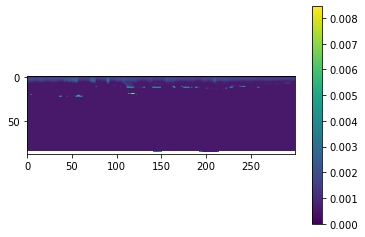

In [32]:
%matplotlib inline
plt.imshow(KPPviscA_Hector[:,20, :].T)
plt.colorbar()

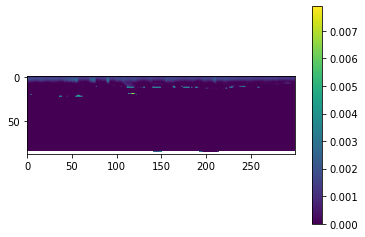

In [33]:
%matplotlib inline
plt.imshow(KPPdiffT_Hector[:,20, :].T)
plt.colorbar()

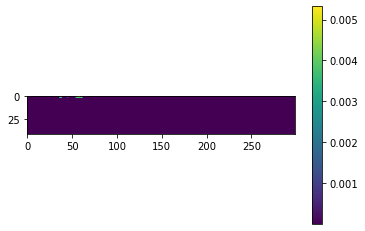

In [34]:
%matplotlib inline
viscArNr = 5.6614e-4
diffusKzT = 5.43999988e-7
diffT = viscAz- viscArNr + diffusKzT
plt.imshow(diffT[:,20, 20:63, 0].T)
plt.colorbar()

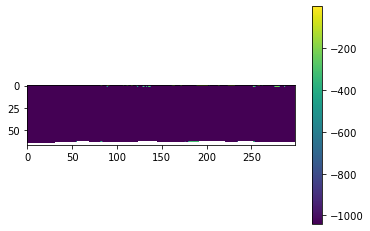

In [35]:
%matplotlib inline
diff_error = (diffT[:,:,0]) / (KPPdiffT_Hector[0:299, 0:299, :,])
plt.imshow(diff_error[:,250, 20:].T)
plt.colorbar()


In [36]:
diffT[:,:,:, 0]

array([[[-5.65596000e-04,  4.96381374e-03,  4.54927904e-03, ...,
         -5.65596000e-04, -5.65596000e-04, -5.65596000e-04],
        [-5.65596000e-04,  4.96244941e-03,  4.52041790e-03, ...,
         -5.65596000e-04, -5.65596000e-04, -5.65596000e-04],
        [-5.65596000e-04,  4.95919984e-03,  4.48128757e-03, ...,
         -5.65596000e-04, -5.65596000e-04, -5.65596000e-04],
        ...,
        [-5.65596000e-04,  4.94746380e-03,  4.29074046e-03, ...,
          5.43999988e-07,  5.43999988e-07, -5.65596000e-04],
        [-5.65596000e-04,  4.95237140e-03,  4.38799526e-03, ...,
          5.43999988e-07,  5.43999988e-07, -5.65596000e-04],
        [-5.65596000e-04,  4.95937794e-03,  4.50182281e-03, ...,
          5.43999988e-07,  5.43999988e-07, -5.65596000e-04]],

       [[-5.65596000e-04,  4.96746745e-03,  4.61552026e-03, ...,
         -5.65596000e-04, -5.65596000e-04, -5.65596000e-04],
        [-5.65596000e-04,  4.95901107e-03,  4.48834664e-03, ...,
         -5.65596000e-04, -5.65596000e

In [37]:
KPPdiffT_Hector[0:99, 0:99,:]

array([[[0.        , 0.00365969, 0.00476686, ...,        nan,
                nan,        nan],
        [0.        , 0.00141215, 0.00195849, ...,        nan,
                nan,        nan],
        [0.        , 0.00142947, 0.00201091, ...,        nan,
                nan,        nan],
        ...,
        [0.        , 0.00162618, 0.00258005, ...,        nan,
                nan,        nan],
        [0.        , 0.00164493, 0.00263249, ...,        nan,
                nan,        nan],
        [0.        , 0.00165931, 0.00267267, ...,        nan,
                nan,        nan]],

       [[0.        , 0.00184969, 0.00321681, ...,        nan,
                nan,        nan],
        [0.        , 0.00142933, 0.00173925, ...,        nan,
                nan,        nan],
        [0.        , 0.00142645, 0.00167924, ...,        nan,
                nan,        nan],
        ...,
        [0.        , 0.00141238, 0.00163481, ...,        nan,
                nan,        nan],
        [0. 

In [45]:
KPPdiffT_Hector.shape

(300, 300, 87)

In [46]:
diffT.shape

(299, 299, 87, 1)

In [38]:
depth = 24
bottom = 49
diffT[diffT == 0] = np.nan
np.nansum((KPPdiffT_Hector[0:-1, 0:-1, depth:bottom] - diffT[:,:,depth:bottom, 0])/ KPPdiffT_Hector[0:-1, 0:-1, depth:bottom]) 

0.000687529060392348

In [39]:
KPPdiffT_Hector[10,10,23:50]

array([5.43999988e-07, 5.43999988e-07, 5.43999988e-07, 5.43999988e-07,
       5.43999988e-07, 5.43999988e-07, 5.43999988e-07, 5.43999988e-07,
       5.43999988e-07, 5.43999988e-07, 5.43999988e-07, 5.43999988e-07,
       5.43999988e-07, 5.43999988e-07, 5.43999988e-07, 5.43999988e-07,
       5.43999988e-07, 5.43999988e-07, 5.43999988e-07, 5.43999988e-07,
       5.43999988e-07, 5.43999988e-07, 5.43999988e-07, 5.43999988e-07,
       5.43999988e-07, 5.43999988e-07, 5.43999988e-07])

In [40]:
diffT.shape

(299, 299, 87, 1)

In [41]:
np.nansum(KPPdiffT_Hector[10,10,23:50] - diffT[10,10,23:50, 0])

4.518261146694018e-15

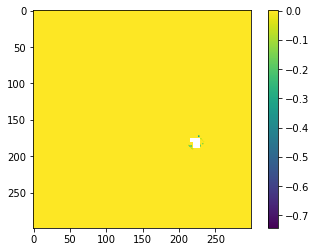

In [42]:
%matplotlib inline
diff_error = (KPPdiffT_Hector[0:-1, 0:-1, 0:60] - diffT[0:,:,0:60, 0]) / KPPdiffT_Hector[0:-1, 0:-1, 0:60]
plt.imshow(diff_error[:,:,58].T)
plt.colorbar()

In [48]:
for a in range(20, 59):    
    print(np.nansum(diff_error[:,:,59] - diff_error[:,:,a]))

78.01066628605363
437.1025569363617
649.2707716596501
20.18180853608633
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.85743043342608
-5.65239033844132
-5.243148053519178
-5.635385282486124
-5.214463896559149
15.181901117102663
9.397372602723237
5.889972480297445
8.066539554792419
5.967972656229925
0.14452909248429535


In [49]:
diff_error.shape

(299, 299, 60)

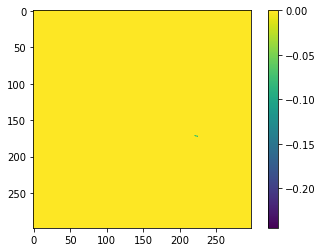

In [50]:
%matplotlib inline
diff_error = (KPPdiffT_Hector[0:-1, 0:-1, 20:87] - diffT[:,:,20:87, 0]) / KPPdiffT_Hector[0:-1, 0:-1, 20:87]
plt.imshow(diff_error[0:-1, 0:-1, 30].T)
plt.colorbar()

In [51]:
KPPdiffT_Hector[0:-1, 0:-1, 81]

array([[5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       ...,
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07]])

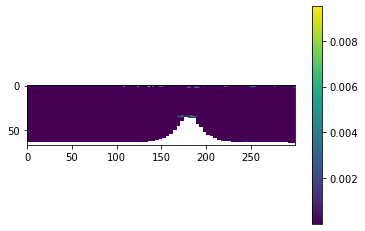

In [52]:
%matplotlib inline
diff_error = (KPPdiffT_Hector[0:-1, 0:-1, 20:87] - diffT[:,:,20:87, 0]) / KPPdiffT_Hector[0:-1, 0:-1, 20:87]
plt.imshow(KPPdiffT_Hector[225, :, 20:87].T)
plt.colorbar()

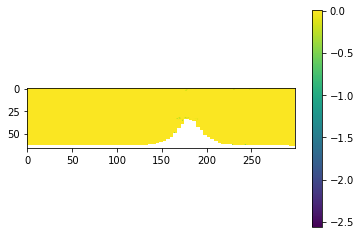

In [53]:
%matplotlib inline
diff_error = (KPPdiffT_Hector[0:-1, 0:-1, 20:87] - diffT[:,:,20:87, 0]) / KPPdiffT_Hector[0:-1, 0:-1, 20:87]
plt.imshow(diff_error[225, :, :].T)
plt.colorbar()

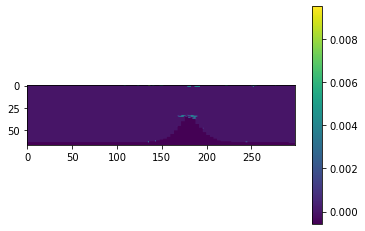

In [54]:
%matplotlib inline
diff_error = (KPPdiffT_Hector[0:-1, 0:-1, 20:87] - diffT[:,:,20:87, 0])
plt.imshow(diffT[225, :, 20:87, 0].T)
plt.colorbar()

In [55]:
diffT[:,:,81, 0]

array([[5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       ...,
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07],
       [5.43999988e-07, 5.43999988e-07, 5.43999988e-07, ...,
        5.43999988e-07, 5.43999988e-07, 5.43999988e-07]])

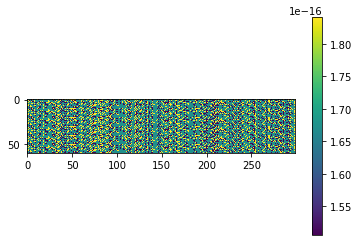

In [56]:
%matplotlib inline
diff_error = (KPPdiffT_Hector[0:-1, 0:-1, 23:83] - diffT[:,:,23:83,0])
plt.imshow(diff_error[:,33,:].T)
plt.colorbar()

In [57]:
error = KPPdiffT_Hector[0:-1, 0:-1, 23:83] - diffT[:,:,23:83,0] / KPPdiffT_Hector[0:-1, 0:-1, 23:83]

In [58]:
np.argwhere(np.abs(error)>0.999).shape

(5329192, 3)

In [59]:
1 - np.argwhere(np.abs(error)>0.9999).shape[0] / np.prod(error.shape)

0.006507943609877609

In [60]:
diff_error[np.isnan(diff_error)] = 0
KPPdiffT_Hector[np.isnan(KPPdiffT_Hector[0:-1, 0:-1, 23:87])] = 0

IndexError: boolean index did not match indexed array along dimension 0; dimension is 300 but corresponding boolean dimension is 299

In [ ]:
np.isnan(KPPdiffT_Hector[0:-1, 0:-1, 23:87]).shape

In [ ]:
np.argwhere(diff_error > 1e-14).shape[0] / np.argwhere(diff_error < 1e-14).shape[0]

In [ ]:
depth

In [ ]:
a = np.argwhere(diff_error[:,:,0:63] > 1e-15)

In [ ]:
big_error = diff_error[a]

In [ ]:
a.shape[0]

In [ ]:
 a.shape[0] / np.prod(diff_error[:,:,0:63].shape)

In [ ]:
%matplotlib inline
diff_error = (KPPdiffT_Hector[0:-1, 0:-1, 20:87] - diffT[:,:,20:87, 0])
plt.imshow(diff_error[:,:,3].T)
plt.colorbar()

It is seeming like we figured this out. At least in a very specific regime, Joe's code mostly predicts KPPviscA correctly. Which means all we have to change is a constant for KPPdiffT

future plans can maybe include figuring out KPP near the sea floor

In [11]:
#pad_field_3D
from pad_field import pad_field_3D

In [9]:
def get_shsq(U,V):
    (nx,ny,nz,nt) = U.shape; ng = 2;  prd = np.array([1,1,1]);
    gx0 = ng; gxn = nx+ng;    gy0 = ng; gyn = ny+ng;    gz0 = ng; gzn = nz+ng; # interior cell limits

    U = pad_field_3D(U,ng,prd); V = pad_field_3D(V,ng,prd);

    shsq = 0.5*( 
        (U[gx0:gxn,gy0:gyn,gz0:gzn,:] - U[gx0:gxn,gy0:gyn,gz0+1:gzn+1,:]) * 
        (U[gx0:gxn,gy0:gyn,gz0:gzn,:] - U[gx0:gxn,gy0:gyn,gz0+1:gzn+1,:]) + 
        (U[gx0+1:gxn+1,gy0:gyn,gz0:gzn,:] - U[gx0+1:gxn+1,gy0:gyn,gz0+1:gzn+1,:])* 
        (U[gx0+1:gxn+1,gy0:gyn,gz0:gzn,:] - U[gx0+1:gxn+1,gy0:gyn,gz0+1:gzn+1,:]) + 
        (V[gx0:gxn,gy0:gyn,gz0:gzn,:] - V[gx0:gxn,gy0:gyn,gz0+1:gzn+1,:])* 
        (V[gx0:gxn,gy0:gyn,gz0:gzn,:] - V[gx0:gxn,gy0:gyn,gz0+1:gzn+1,:]) + 
        (V[gx0:gxn,gy0+1:gyn+1,gz0:gzn,:] - V[gx0:gxn,gy0+1:gyn+1,gz0+1:gzn+1,:])* 
        (V[gx0:gxn,gy0+1:gyn+1,gz0:gzn,:] - V[gx0:gxn,gy0+1:gyn+1,gz0+1:gzn+1,:]));
    
    shsq = 0.5*shsq + 0.125*( 
        (U[gx0:gxn,gy0-1:gyn-1,gz0:gzn,:]-U[gx0:gxn,gy0-1:gyn-1,gz0+1:gzn+1,:])* 
        (U[gx0:gxn,gy0-1:gyn-1,gz0:gzn,:]-U[gx0:gxn,gy0-1:gyn-1,gz0+1:gzn+1,:]) + 
        (U[gx0+1:gxn+1,gy0-1:gyn-1,gz0:gzn,:]-U[gx0+1:gxn+1,gy0-1:gyn-1,gz0+1:gzn+1,:])* 
        (U[gx0+1:gxn+1,gy0-1:gyn-1,gz0:gzn,:]-U[gx0+1:gxn+1,gy0-1:gyn-1,gz0+1:gzn+1,:]) + 
        (U[gx0:gxn,gy0+1:gyn+1,gz0:gzn,:]-U[gx0:gxn,gy0+1:gyn+1,gz0+1:gzn+1,:])* 
        (U[gx0:gxn,gy0+1:gyn+1,gz0:gzn,:]-U[gx0:gxn,gy0+1:gyn+1,gz0+1:gzn+1,:]) + 
        (U[gx0+1:gxn+1,gy0+1:gyn+1,gz0:gzn,:]-U[gx0+1:gxn+1,gy0+1:gyn+1,gz0+1:gzn+1,:])* 
        (U[gx0+1:gxn+1,gy0+1:gyn+1,gz0:gzn,:]-U[gx0+1:gxn+1,gy0+1:gyn+1,gz0+1:gzn+1,:]) + 
        (V[gx0-1:gxn-1,gy0:gyn,gz0:gzn,:]-V[gx0-1:gxn-1,gy0:gyn,gz0+1:gzn+1,:])* 
        (V[gx0-1:gxn-1,gy0:gyn,gz0:gzn,:]-V[gx0-1:gxn-1,gy0:gyn,gz0+1:gzn+1,:]) + 
        (V[gx0-1:gxn-1,gy0+1:gyn+1,gz0:gzn,:]-V[gx0-1:gxn-1,gy0+1:gyn+1,gz0+1:gzn+1,:])* 
        (V[gx0-1:gxn-1,gy0+1:gyn+1,gz0:gzn,:]-V[gx0-1:gxn-1,gy0+1:gyn+1,gz0+1:gzn+1,:]) + 
        (V[gx0+1:gxn+1,gy0:gyn,gz0:gzn,:]-V[gx0+1:gxn+1,gy0:gyn,gz0+1:gzn+1,:])* 
        (V[gx0+1:gxn+1,gy0:gyn,gz0:gzn,:]-V[gx0+1:gxn+1,gy0:gyn,gz0+1:gzn+1,:]) + 
        (V[gx0+1:gxn+1,gy0+1:gyn+1,gz0:gzn,:]-V[gx0+1:gxn+1,gy0+1:gyn+1,gz0+1:gzn+1,:])* 
        (V[gx0+1:gxn+1,gy0+1:gyn+1,gz0:gzn,:]-V[gx0+1:gxn+1,gy0+1:gyn+1,gz0+1:gzn+1,:]));
        
    return shsq;

In [21]:
Ujoe = f.U
Vjoe = f.V
Ujoe.shape

(300, 299, 87, 2)

In [17]:
import time

In [19]:
start = time.time()
joe_shsq = get_shsq(Ujoe, Vjoe)
end = time.time()
print(end-start)

3.788802146911621


In [20]:
joe_shsq.shape

(300, 299, 87, 2)

In [23]:
import xarray
# to use xarray ufunc, you'll have to have the coordiantes which I don't really need to deal with?

In [ ]:
def compute_rho_mitgcm(self):
        # get dims
        (nx,ny,nz,nt) = self.T.shape;
                
        rho0 = 1035; g = 9.81;
        p = (np.cumsum(self.thknss,axis=2)-0.5*self.thknss)*g*rho0/10000 + 10;
        SA = np.zeros([nx,ny,nz,nt]); CT = np.zeros([nx,ny,nz,nt]); self.rho = np.zeros([nx,ny,nz,nt]);
        for k in range(0,nz):
            for t in range(0,nt):
                SA[:,:,k,t] = gsw.SA_from_SP(self.S[:,:,k,t],p[:,:,k,0],np.squeeze(self.pgrid[:,:,0]),np.squeeze(self.pgrid[:,:,1]));
                CT[:,:,k,t] = gsw.CT_from_t(SA[:,:,k,t],self.T[:,:,k,t],p[:,:,k,0]);
                self.rho[:,:,k,t] = gsw.rho(SA[:,:,k,t],CT[:,:,k,t],p[:,:,k,0]);

def compute_pot_rho_down_mitgcm(self):
        # get dims
        (nx,ny,nz,nt) = self.T.shape;
                
        rho0 = 1035; g = 9.81;
        p = (np.cumsum(self.thknss,axis=2)-0.5*self.thknss)*g*rho0/10000 + 10;
        SA = np.zeros([nx,ny,nz,nt]); CT = np.zeros([nx,ny,nz,nt]); pot_rho = np.zeros([nx,ny,nz,nt]);
        for k in range(0,nz-1):
            for t in range(0,nt):
                SA[:,:,k,t] = gsw.SA_from_SP(self.S[:,:,k,t],p[:,:,k+1,0],np.squeeze(self.pgrid[:,:,0]),np.squeeze(self.pgrid[:,:,1]));
                CT[:,:,k,t] = gsw.CT_from_t(SA[:,:,k,t],self.T[:,:,k,t],p[:,:,k+1,0]);
                pot_rho[:,:,k,t] = gsw.rho(SA[:,:,k,t],CT[:,:,k,t],p[:,:,k+1,0]);

        return pot_rho;


In [44]:
p = (np.cumsum(f.thknss,axis=2)-0.5*f.thknss)*9.81*1035/10000 + 10

In [43]:
p[50,50,:,1]

array([5.00000000e-01, 1.57000005e+00, 2.78999996e+00, 4.18499994e+00,
       5.77999973e+00, 7.59500027e+00, 9.65999985e+00, 1.20100002e+01,
       1.46800003e+01, 1.77049999e+01, 2.11250000e+01, 2.49900017e+01,
       2.93450012e+01, 3.42400017e+01, 3.97249985e+01, 4.58549995e+01,
       5.26900024e+01, 6.02799988e+01, 6.86849976e+01, 7.79649963e+01,
       8.81750031e+01, 9.93699951e+01, 1.11600006e+02, 1.24915009e+02,
       1.39365005e+02, 1.54990005e+02, 1.71825012e+02, 1.89899994e+02,
       2.09235001e+02, 2.29855011e+02, 2.51769989e+02, 2.74984985e+02,
       2.99505005e+02, 3.25320007e+02, 3.52419983e+02, 3.80790009e+02,
       4.10410004e+02, 4.41255005e+02, 4.73304993e+02, 5.06540009e+02,
       5.40934998e+02, 5.76464966e+02, 6.13109985e+02, 6.50854980e+02,
       6.89684998e+02, 7.29594971e+02, 7.70584961e+02, 8.12659973e+02,
       8.55834961e+02, 9.00135010e+02, 9.45594971e+02, 9.92260010e+02,
       1.04017993e+03, 1.08942505e+03, 1.14008008e+03, 1.19223499e+03,
      

In [39]:
thick = f.thknss[50,50,:,1]
thick

array([  1.       ,   1.1400001,   1.3      ,   1.4899998,   1.7000003,
         1.9300003,   2.1999998,   2.5      ,   2.8400002,   3.209999 ,
         3.630001 ,   4.1000004,   4.6099987,   5.180002 ,   5.789997 ,
         6.470001 ,   7.200001 ,   7.9799957,   8.830002 ,   9.730003 ,
        10.689995 ,  11.700005 ,  12.760002 ,  13.870003 ,  15.029999 ,
        16.220001 ,  17.449997 ,  18.699997 ,  19.970001 ,  21.270004 ,
        22.559982 ,  23.870026 ,  25.169983 ,  26.459991 ,  27.74002  ,
        29.       ,  30.23999  ,  31.450012 ,  32.649994 ,  33.820007 ,
        34.96997  ,  36.090027 ,  37.200012 ,  38.289978 ,  39.369995 ,
        40.450012 ,  41.52997  ,  42.619995 ,  43.73004  ,  44.869995 ,
        46.049988 ,  47.28003  ,  48.559937 ,  49.930054 ,  51.380005 ,
        52.92993  ,  54.610107 ,  56.41992  ,  58.380005 ,  60.53003  ,
        62.869995 ,  65.42993  ,  68.24011  ,  71.329956 ,  74.72998  ,
        78.46997  ,  82.609985 ,  87.170044 ,  92.20996  ,  97.7

In [45]:
import gsw_xarray as gswx

In [2]:
import xarray

TypeError: <class 'numpy.typing._dtype_like._SupportsDType'> is not a generic class